In [1]:
# Visual Semantic Relatedness Dataset for Image Captioning 
# Demo for Visual semantic with BERT-CNN model (visual, caption [relatendess score])

In [2]:
# requirment python 3.6 or 3.7
!pip install tensorflow==1.15.4
!pip install --upgrade tensorflow_hub==0.7.0
#pip install 'h5py==2.10.0' --force-reinstall
!pip install 'h5py==2.10.0' #2.10.0


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# install fine-tune BERT layer 
!git clone https://github.com/gaphex/bert_experimental/

Cloning into 'bert_experimental'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 278 (delta 23), reused 27 (delta 12), pack-reused 227
Receiving objects: 100% (278/278), 363.92 KiB | 2.13 MiB/s, done.
Resolving deltas: 100% (154/154), done.


In [4]:
# install uncased_L-12_H-768_A-12
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip uncased_L-12_H-768_A-12.zip

--2023-01-05 13:25:45--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4006:808::2010, 2a00:1450:4006:804::2010, 2a00:1450:4006:80a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4006:808::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388,84M  10,9MB/s    in 37s     

2023-01-05 13:26:22 (10,6 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: unca

In [5]:
# install dataset 
!wget https://www.dropbox.com/s/dh38xibtjpohbeg/train_all.zip
!unzip train_all.zip

--2023-01-05 13:26:26--  https://www.dropbox.com/s/dh38xibtjpohbeg/train_all.zip
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/dh38xibtjpohbeg/train_all.zip [following]
--2023-01-05 13:26:27--  https://www.dropbox.com/s/raw/dh38xibtjpohbeg/train_all.zip
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ef400a2959df5dc3602df4b9e.dl.dropboxusercontent.com/cd/0/inline/Bz9fK4rywH2H_uWNscY3rGTVmlH8e9Q4IhorGZA3GD5gW-hiwuRlFKz7g9fJuh10ZnReQzG7ZmrvQWptUGJH0VS5Z0T5UVx1hmGLtrrBfggNN3jx5FsE1BdkhDGi5pC07pXWqzI2IbSTn3hm1dLokoN6I5WsXNdsN6NWmfk7Py7Gig/file# [following]
--2023-01-05 13:26:28--  https://uc3ef400a2959df5dc3602df4b9e.dl.dropboxusercontent.com/cd/0/inline/Bz9fK4rywH2H_uWNscY3rGTVmlH8e9Q4IhorGZA3GD5gW-hiwuRlFKz7g9

In [6]:
!wget https://www.dropbox.com/s/ip7p0wiwkwvph5k/0.4_bert-cnn.zip
!unzip 0.4_bert-cnn.zip

--2023-01-05 13:26:37--  https://www.dropbox.com/s/ip7p0wiwkwvph5k/0.4_bert-cnn.zip
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ip7p0wiwkwvph5k/0.4_bert-cnn.zip [following]
--2023-01-05 13:26:38--  https://www.dropbox.com/s/raw/ip7p0wiwkwvph5k/0.4_bert-cnn.zip
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb22bc4022a497a516fdd6531ca.dl.dropboxusercontent.com/cd/0/inline/Bz-F2w3vYS__2kE8o1Q4myL8YUPX6HoeFVUaujH0n2-UMncA_5Nz7xN0H-UD1_liqmUcPqrRaamYPh80-eShuXeAliw8NsIXNoAn4E204OebF38VNypiRjt9-3gCxgIGLQyP9y1CAbGXOHhJ3C583ziKH8iFM-DIuRqPM9RxWodMCw/file# [following]
--2023-01-05 13:26:38--  https://ucb22bc4022a497a516fdd6531ca.dl.dropboxusercontent.com/cd/0/inline/Bz-F2w3vYS__2kE8o1Q4myL8YUPX6HoeFVUaujH0n2-UMncA_

In [7]:
# need to change
#https://www.dropbox.com/s/y981mlexqyj2gv5/BERT-CNN_demo.zip
!wget https://www.dropbox.com/s/qhl6cdfb2ykposs/BERT-CNN_demo.zip
!unzip BERT-CNN_demo.zip

--2023-01-05 13:27:25--  https://www.dropbox.com/s/qhl6cdfb2ykposs/BERT-CNN_demo.zip
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qhl6cdfb2ykposs/BERT-CNN_demo.zip [following]
--2023-01-05 13:27:26--  https://www.dropbox.com/s/raw/qhl6cdfb2ykposs/BERT-CNN_demo.zip
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc983e21cd44fcd62cb211f84d9.dl.dropboxusercontent.com/cd/0/inline/Bz-1srdMRgOyawRbVA10MD8OmYU8xHfUvfXC86YOg-KENCfv1xxCSXHUMdxheOlU3ICD7y-a3XViWvAcYWo0rT0hn8cmg-0vLiLwLtzlzjiktUL5kbqJXFs01axrWDGUrCOfJ8_gBGJpCYf02JmqrajWrNXr3d0ecy-qBSMP30AWSQ/file# [following]
--2023-01-05 13:27:26--  https://ucc983e21cd44fcd62cb211f84d9.dl.dropboxusercontent.com/cd/0/inline/Bz-1srdMRgOyawRbVA10MD8OmYU8xHfUvfXC86YOg-KENC

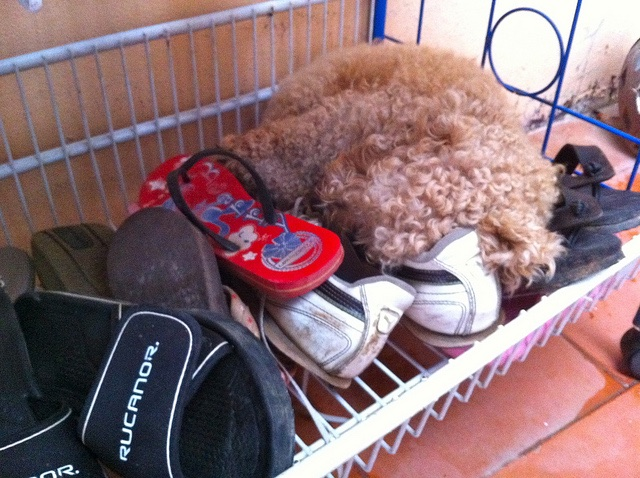

In [8]:
from IPython.display import Image, display
display(Image('BERT-CNN_demo/COCO_val2014_000000000042.jpg'))

In [9]:
# Re-ranking task
!python BERT-CNN_demo/eval.py --file BERT-CNN_demo/test.tsv

import/input_1_1 import/dense_1/Sigmoid

2023-01-05 13:27:33.375593: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-01-05 13:27:33.391387: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe4e46f2b00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-01-05 13:27:33.391420: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
['standard poodle shopping cart footwear ||| a close up of shoes and a dog in a basket'
 'standard poodle shopping cart footwear ||| a brown teddy bear laying on top of a pair of shoes']
[[0.99774158]
 [0.0621758029]]
None


In [10]:
# Appendix example 
#Visual context-based data filtering  for image caption-pair extracted from the internet (e.g., Instagram).
#(inspired from BLIP https://arxiv.org/pdf/2201.12086.pdf)
!python BERT-CNN_demo/eval.py --file BERT-CNN_demo/test_annotation.tsv

import/input_1_1 import/dense_1/Sigmoid

2023-01-05 13:27:48.550458: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-01-05 13:27:48.573115: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb508027820 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-01-05 13:27:48.573137: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
['paddle surfboard ||| I like the sunset view from here'
 'paddle surfboard ||| we are enjoying summer holidy at the beach ']
[[0.000256851636]
 [0.00230519986]]
None
